In [35]:
import numpy as np
import pandas as pd
import warnings

In [36]:
warnings.filterwarnings('ignore')   #use to ignore warning messages

In [37]:
#Get the data into Pandas Dataframe object
column_names = ['user_id', 'item_id', 'rating', 'timestamp']  #giving the names to column
df = pd.read_csv('/Users/bhuvang/Desktop/ml-100k/u.data', sep='\t', names=column_names) #used to tab seperated file


In [38]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [39]:
df["user_id"].nunique() #in 100k  ratings there are 943 unique users

943

In [40]:
df["item_id"].nunique()#1682 unique movies

1682

In [42]:
movies_titles = pd.read_csv("/Users/bhuvang/Desktop/ml-100k/u.item",encoding= 'unicode_escape',sep = "\|",header=None)#read item file to get name of the movie by itemid

In [43]:
movies_titles.shape

(1682, 24)

In [44]:
movies_titles = movies_titles[[0,1]]  #we need 1st and 2nd column

In [45]:
movies_titles.shape

(1682, 2)

In [46]:
movies_titles.columns = ['item_id','title']

In [47]:
movies_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [48]:
df = pd.merge(df, movies_titles, on="item_id")  #merging two data frame df and movie title


In [49]:
df.head()


,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [50]:
df.tail()


,user_id,item_id,rating,timestamp,title
99995,840,1674,4,891211682,Mamma Roma (1962)
99996,655,1640,3,888474646,"Eighth Day, The (1996)"
99997,655,1637,3,888984255,Girls Town (1996)
99998,655,1630,3,887428735,"Silence of the Palace, The (Saimt el Qusur) (1..."
99999,655,1641,3,887427810,Dadetown (1995)


In [51]:
#eda explortry data set analysis
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')

In [52]:
df.groupby('title').mean()['rating'].sort_values(ascending=False).head() #group by title of mean of ratings and sort in descding order
#to find average rating
#if 1 person has rated 5 for that movie and rating of movie is 5 but we cant concider because rater is only 1

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [53]:
df.groupby('title').count()['rating'].sort_values(ascending=False).head(n=10) #group by title and count the number of ratings 


title
Star Wars (1977)                 583
Contact (1997)                   509
Fargo (1996)                     508
Return of the Jedi (1983)        507
Liar Liar (1997)                 485
English Patient, The (1996)      481
Scream (1996)                    478
Toy Story (1995)                 452
Air Force One (1997)             431
Independence Day (ID4) (1996)    429
Name: rating, dtype: int64

In [54]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])


In [55]:
ratings.head()


,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [56]:
ratings['num_of_ratings'] = pd.DataFrame(df.groupby('title').count()['rating'])  #adding new coloumn which counts number of ratings


In [57]:
ratings.head()


,rating,num_of_ratings
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


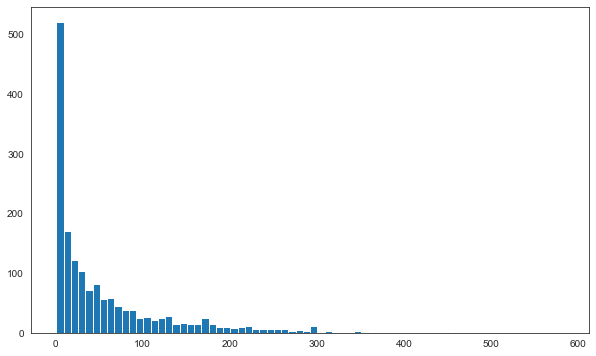

In [58]:
plt.figure(figsize=(10,6))
plt.hist(ratings['num_of_ratings'],bins=70)  #x axis is number of ratings
plt.show()

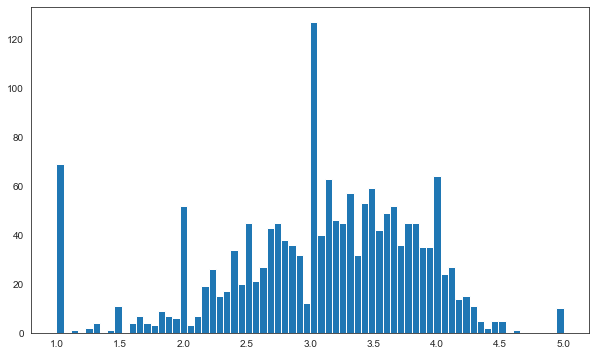

In [59]:
plt.figure(figsize=(10,6))
plt.hist(ratings['rating'],bins=70)#of ratings
plt.show()

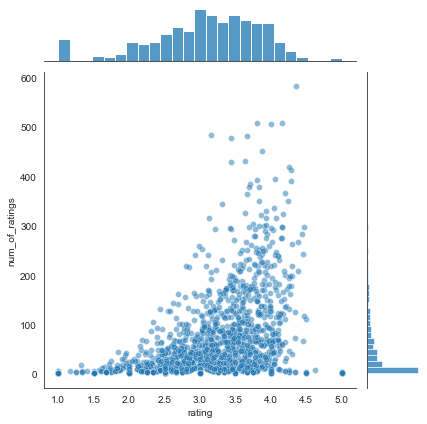

In [60]:
sns.jointplot(x='rating' , y='num_of_ratings' , data=ratings, alpha=0.5)
plt.show()

In [61]:
#Creating Movie Recommendation

In [62]:
movie_matrix = df.pivot_table(index="user_id", columns="title", values="rating")  #create a matrix in which particular user has rated movie if rated or null


In [63]:
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [64]:
def predict_movies(movie_name): #to find how a given moie is correlated to other movies
    movie_user_ratings = movie_matrix[movie_name]#takes the ratinf of the movie by each user
    similar_to_movie = movie_matrix.corrwith(movie_user_ratings)#find corelation with that movie
    corr_movie_name = pd.DataFrame(similar_to_movie, columns=['Correlation'])#create a dataframe
    corr_movie_name.dropna(inplace = True)#to drop null value
    corr_movie_name = corr_movie_name.join(ratings['num_of_ratings'])#joining corelation with number of ratings
    predictions = corr_movie_name[corr_movie_name['num_of_ratings']>100].sort_values('Correlation', ascending=False)#take movie which rating is greater than 100
    return predictions

In [65]:
predictions = predict_movies("Titanic (1997)")

In [66]:
predictions.head()

,Correlation,num_of_ratings
title,,
Titanic (1997),1.000000,350
"River Wild, The (1994)",0.497600,146
"Abyss, The (1989)",0.472103,151
Bram Stoker's Dracula (1992),0.443560,120
True Lies (1994),0.435104,208
